In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Load dataset

In [2]:
df = pd.read_json('Dataset/endomondo.json', lines=True)
df.head()

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,sport,userId
0,-0.002000,2469.6900,male,165.336,205454648,29.094667,-81.353615,0.000000,run,478585
1,-0.003599,1946.8801,male,136.688,444762628,13.688887,100.756050,29.722687,bike,11555239
2,-0.004800,966.8748,male,162.262,471800528,55.596527,12.356528,11.776106,run,762872
3,-0.006400,1053.2084,male,155.538,571582823,57.019640,9.918752,14.061889,run,745030
4,-0.006800,1052.5713,male,135.894,499773014,56.376488,9.304066,31.494408,bike,65547


In [3]:
df.sport.unique()

array(['run', 'bike', 'rowing', 'treadmill running', 'orienteering',
       'mountain bike', 'bike (transport)', 'indoor cycling',
       'cross-country skiing', 'kayaking', 'circuit training', 'walk',
       'core stability training', 'skate', 'weight training', 'hiking',
       'roller skiing', 'swimming', 'fitness walking', 'pilates',
       'sailing', 'gymnastics', 'aerobics', 'yoga', 'tennis',
       'downhill skiing', 'snowboarding', 'badminton', 'soccer', 'rugby',
       'snowshoeing', 'golf', 'climbing', 'elliptical', 'windsurfing',
       'martial arts', 'stair climing', 'horseback riding', 'squash',
       'basketball', 'table tennis', 'treadmill walking', 'kite surfing'],
      dtype=object)

## Get only bike & run sport.

In [4]:
mask = (df['sport'] == 'run') | (df['sport'] == 'bike')
run_bike_df = df[mask]

In [5]:
run_bike_df.head()

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,sport,userId
0,-0.002000,2469.6900,male,165.336,205454648,29.094667,-81.353615,0.000000,run,478585
1,-0.003599,1946.8801,male,136.688,444762628,13.688887,100.756050,29.722687,bike,11555239
2,-0.004800,966.8748,male,162.262,471800528,55.596527,12.356528,11.776106,run,762872
3,-0.006400,1053.2084,male,155.538,571582823,57.019640,9.918752,14.061889,run,745030
4,-0.006800,1052.5713,male,135.894,499773014,56.376488,9.304066,31.494408,bike,65547


In [6]:
df.shape

(167783, 10)

In [7]:
run_bike_df.shape

(142506, 10)

In [8]:
run_bike_df.sport.unique()

array(['run', 'bike'], dtype=object)

In [9]:
X = run_bike_df.loc[:, ['longitude', 'latitude']]
X.head()

,longitude,latitude
0,-81.353615,29.094667
1,100.756050,13.688887
2,12.356528,55.596527
3,9.918752,57.019640
4,9.304066,56.376488


In [10]:
model = KMeans(n_clusters=5, random_state=8)
model.fit(X)
model.cluster_centers_

array([[ 10.19351831,  51.83619294],
       [104.28065042,  20.41522988],
       [-89.02281587,  37.80546419],
       [-13.41790011, -24.09482861],
       [165.37391352, -37.76368631]])

In [11]:
predictions = model.predict(X)

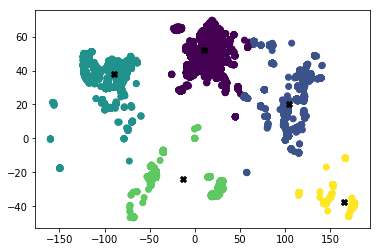

In [12]:
plt.scatter(X.longitude, X.latitude, c=predictions)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='X', c='black')

In [13]:
predictions

array([2, 1, 0, ..., 0, 0, 0])

In [14]:
X = run_bike_df.drop(['id'], axis=1)
X.head()

,altitude,distance,gender,heart_rate,latitude,longitude,speed,sport,userId
0,-0.002000,2469.6900,male,165.336,29.094667,-81.353615,0.000000,run,478585
1,-0.003599,1946.8801,male,136.688,13.688887,100.756050,29.722687,bike,11555239
2,-0.004800,966.8748,male,162.262,55.596527,12.356528,11.776106,run,762872
3,-0.006400,1053.2084,male,155.538,57.019640,9.918752,14.061889,run,745030
4,-0.006800,1052.5713,male,135.894,56.376488,9.304066,31.494408,bike,65547


In [15]:
mask = (run_bike_df.userId == 478585) & (run_bike_df.sport == 'run')
sample_ = X[mask].drop('sport', axis=1)
sample_

,altitude,distance,gender,heart_rate,latitude,longitude,speed,userId
0,-0.002000,2469.6900,male,165.336,29.094667,-81.353615,0.000000,478585
8,-0.010000,2469.5900,male,159.386,29.090100,-81.353460,0.000000,478585
9,-0.010000,2469.9417,male,150.568,29.104761,-81.354370,0.000000,478585
10,-0.010000,2470.4023,male,159.138,29.108345,-81.371470,0.000000,478585
13,-0.012000,2470.3870,male,156.406,29.108252,-81.370840,0.000000,478585
21,-0.016000,2468.9993,male,111.874,29.063957,-81.353065,0.000000,478585
22,-0.016000,2469.7214,male,156.772,29.095665,-81.353880,0.000000,478585
23,-0.018000,2469.9749,male,156.280,29.106293,-81.354520,0.000000,478585
24,-0.018000,2470.3090,male,152.498,29.108412,-81.367165,0.000000,478585
28,-0.020000,2469.8691,male,153.490,29.102034,-81.354080,0.000000,478585


In [16]:
run_df = run_bike_df[run_bike_df.sport == 'run'].drop('sport', axis=1)

In [17]:
run_df.head()

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,userId
0,-0.0020,2469.6900,male,165.336,205454648,29.094667,-81.353615,0.000000,478585
2,-0.0048,966.8748,male,162.262,471800528,55.596527,12.356528,11.776106,762872
3,-0.0064,1053.2084,male,155.538,571582823,57.019640,9.918752,14.061889,745030
6,-0.0096,1007.3579,male,139.600,235870865,55.414467,10.364039,0.000000,16786
7,-0.0100,1053.6771,male,175.010,590075340,57.036550,9.914627,16.752308,3297710


In [18]:
run_df = run_df.reset_index(drop=True)

In [19]:
run_df.gender.unique()

array(['male', 'female', 'unknown'], dtype=object)

In [20]:
run_df['gender'] = LabelEncoder().fit_transform(run_df.gender)
run_df.gender.unique()

array([1, 0, 2], dtype=int64)

In [21]:
run_df.shape

(70591, 9)

In [22]:
features = ['altitude', 'distance', 'gender', 'heart_rate', 'latitude', 'longitude', 'speed']
X = run_df.loc[:, features]
X.head()

,altitude,distance,gender,heart_rate,latitude,longitude,speed
0,-0.0020,2469.6900,1,165.336,29.094667,-81.353615,0.000000
1,-0.0048,966.8748,1,162.262,55.596527,12.356528,11.776106
2,-0.0064,1053.2084,1,155.538,57.019640,9.918752,14.061889
3,-0.0096,1007.3579,1,139.600,55.414467,10.364039,0.000000
4,-0.0100,1053.6771,1,175.010,57.036550,9.914627,16.752308


In [23]:
scaled_run = MinMaxScaler().fit_transform(run_df.loc[:, features])
scaled_run_df = pd.DataFrame(scaled_run, columns=features)
scaled_run_df['id'] = run_df.id
scaled_run_df.head()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,altitude,distance,gender,heart_rate,latitude,longitude,speed,id
0,0.049311,0.510411,0.5,0.955631,0.648865,0.228134,0.000000,205454648
1,0.049310,0.199824,0.5,0.952591,0.878241,0.507744,0.232325,471800528
2,0.049310,0.217667,0.5,0.945940,0.890558,0.500470,0.277421,571582823
3,0.049310,0.208191,0.5,0.930176,0.876665,0.501799,0.000000,235870865
4,0.049310,0.217764,0.5,0.965200,0.890704,0.500458,0.330499,590075340


In [24]:
def recommend(user_id, n_recommendations=5):
    global features
    
    # Select user data and scale it to range (0, 1)
    temp_df = scaled_run_df.loc[run_df.userId == user_id].mean()
    print(run_df.loc[run_df.userId == user_id, features].mean())
    
    # Fit model
    X = scaled_run_df.loc[run_df.userId != user_id]
    uknn_model = NearestNeighbors(n_neighbors=n_recommendations).fit(X)
    
    # get n nearest neighbors
    distances, indices = uknn_model.kneighbors(temp_df.values.reshape(1, -1))
    
    # get result
    result_df = run_df.loc[indices[0]]
    result_df['neighbor_dist'] = distances[0]
    result_df['for'] = [user_id for i in range(n_recommendations)]
    
    return result_df

In [25]:
result_df = recommend(478585, n_recommendations=10)

altitude        11.739356
distance      2470.923300
gender           1.000000
heart_rate     153.197307
latitude        29.125878
longitude      -81.377347
speed            1.631551
dtype: float64


In [26]:
result_df

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,userId,neighbor_dist,for
15336,136.323680,874.9253,1,127.646,424752038,52.500427,13.372593,0.000000,3908642,3740.970625,478585
22699,17.988000,1064.4711,1,142.282,164961998,56.694458,9.089926,0.000000,1986853,4942.029430,478585
65886,8.724793,1052.8298,1,158.266,286831887,57.111668,10.027677,0.000000,745030,11822.029419,478585
29627,21.974407,1223.2842,1,153.428,199441978,53.535970,-1.170976,0.000000,4330976,19532.029418,478585
33566,241.569930,1027.9795,1,138.748,282335174,50.386646,4.414006,0.000000,8349084,26821.970598,478585
28572,204.739580,659.8667,1,150.828,531438419,54.767050,25.256882,7.927907,5095069,32894.970589,478585
29484,21.721200,890.5762,1,179.796,151076939,39.467870,-0.359896,14.920333,56331,33245.970592,478585
14267,1309.442600,1206.3234,1,142.400,573321798,-25.727999,28.220438,0.000000,860533,44276.029417,478585
49010,41.503197,1047.6523,1,132.660,347172266,55.771088,8.918607,0.000000,3736342,46558.029414,478585
4739,1.974400,961.6940,1,153.580,366634500,55.652477,12.644215,0.000000,3709276,50964.029416,478585


In [27]:
result_df.to_json('Dataset/recommendation.json', orient='records', lines=True)

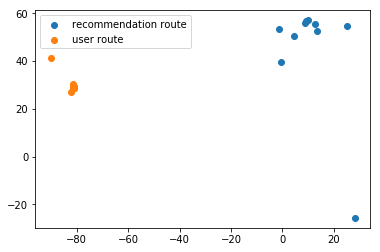

In [28]:
plt.scatter(result_df.longitude, result_df.latitude)
plt.scatter(run_df.loc[run_df.userId == 478585, 'longitude'], run_df.loc[run_df.userId == 478585, 'latitude'])
plt.legend(['recommendation route', 'user route'])

## Recommendation by nearest route location with KMeans

In [29]:
run_df.head()

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,userId
0,-0.0020,2469.6900,1,165.336,205454648,29.094667,-81.353615,0.000000,478585
1,-0.0048,966.8748,1,162.262,471800528,55.596527,12.356528,11.776106,762872
2,-0.0064,1053.2084,1,155.538,571582823,57.019640,9.918752,14.061889,745030
3,-0.0096,1007.3579,1,139.600,235870865,55.414467,10.364039,0.000000,16786
4,-0.0100,1053.6771,1,175.010,590075340,57.036550,9.914627,16.752308,3297710


In [30]:
X = scaled_run_df.loc[:, ['longitude', 'latitude']]
km_model = KMeans(n_clusters=4, random_state=88)
km_model.fit(X)
predictions = km_model.predict(X)
run_df['cluster'] = predictions
scaled_run_df['cluster'] = predictions

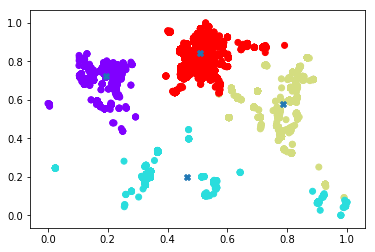

In [31]:
plt.scatter(X.longitude, X.latitude, c=predictions, cmap='rainbow')
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], marker='X', cmap='black')

In [32]:
def recommend_byloc(user_id, n_recommendations=5):
    global km_model
    global scaled_run_df
    
    temp_df = scaled_run_df.loc[run_df.userId == user_id, ['longitude', 'latitude']]
    temp_df = temp_df.mean().values.reshape(1, -1)
    predictions = km_model.predict(temp_df)
    print(predictions)
    
    cluster_member = scaled_run_df.loc[(scaled_run_df['cluster'] == predictions[0])]
    print(cluster_member.cluster.unique())
    X = cluster_member.loc[:, ['longitude', 'latitude']]
    plt.scatter(X.longitude, X.latitude)
    plt.show()
    
    model = NearestNeighbors(n_neighbors=n_recommendations).fit(X)
    predictions = model.kneighbors(temp_df)
    
    return predictions

[0]
[0]


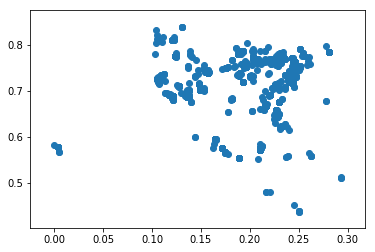

(array([[7.02200201e-05, 1.11270434e-04, 1.25681371e-04, 1.37164439e-04,
         1.41403200e-04]]),
 array([[ 546,   20,   13, 4004, 4589]], dtype=int64))

In [33]:
distances, indices = recommend_byloc(478585)
distances, indices

In [34]:
scaled_run_df.loc[indices[0]]

,altitude,distance,gender,heart_rate,latitude,longitude,speed,id,cluster
546,0.049184,0.416970,0.5,0.929088,0.667087,0.833188,0.0,237979208,2
20,0.049309,0.510452,0.5,0.941802,0.648935,0.228133,0.0,393131689,0
13,0.049309,0.510418,0.5,0.947161,0.648874,0.228134,0.0,283455539,0
4004,0.049372,0.510408,0.5,0.949758,0.648858,0.228135,0.0,256475717,0
4589,0.049482,0.198243,0.0,0.952947,0.871139,0.506317,0.0,622191367,3


In [35]:
run_df.loc[indices[0]]

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,userId,cluster
546,-1.285997,2017.5602,1,138.500,237979208,31.200000,121.428215,0.0,6601602,2
20,-0.022000,2469.8848,1,151.354,393131689,29.102734,-81.354140,0.0,478585,0
13,-0.016000,2469.7214,1,156.772,283455539,29.095665,-81.353880,0.0,478585,0
4004,0.624000,2469.6724,1,159.398,256475717,29.093842,-81.353540,0.0,478585,0
4589,1.736016,959.2215,0,162.622,622191367,54.776054,11.878376,0.0,9198615,3
